# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Emma Oswald
### &#9989; Lucas Clatterbaugh

#### &#9989; Last Updated on 4/16/23

# Exoplanets!!!

##  Introduction 

In our original project, we set out to answer the question of whether or not we could accurately predict if an exoplanet was present in a system by using lightcurve data and Machine Learning methods. This topic has become very important and widely discussed by many astrophyscists in recent years. New missions (like Kepler, and TESS) have increased the quantity of lightcurve observations and data we receive daily. That means that a need for a faster way to not only analyze this data, but analyze it very accurately and precisely has also increased. We did extensive research on this topic; from researching the background (like how ML has been used in recent years to analyze lightcurves, and reading papers that analyzed which machine learning method proved the most accurate when analyzing lightcurves for potential exoplanets), to learning new packages to download lightcurve data, and how to use the data.  

However, this topic was not without its pitfalls. When we attempted to download lightcurves from observations of only one system, both of our laptops could not process the data. We ran into a similar issue when attempting to run the same code on Google colab. Neither of us (or google colab in this instance) had the computational power to analyze data for one system, let alone many different star systems. 

We decided to change our focus. Along with all of this new transit data, we are discovering more and more exoplanets. Even in our solar system we see many different types of planets, the differences between Neptune and Jupiter alone are striking. We realized that as we discover more and more exoplanets, we will need a way to categorize or classify these planets, so that they are easily distinguishable from one another. 
    
We also knew that one of the most interesting things scientists look for when evaluating a new exoplanet is its habitability. The search for a potentially habitable system has been well underway, but again, can be very time consuming when we are constantly gathering large amounts of data. So, a system in which we can quickly, and accurately determine if an exoplanet is habitable is also quickly becoming a necessity. 
    
After evaluating the need for each of these classifications, it became clear what we wanted to evaluate:
    
1. What are the classifications of exoplanets that have been discovered and confirmed by the Kepler missions?
2. Which of the confirmed exoplanets in these missions are habitable? 
    
We were able to collect data on the physical characteristics of a relatively large number of confirmed exoplanets. This included characteristics of the exoplanets themselves, as well as the system that the exoplanet inhabits. This data was sourced from NASA's Exoplanet Archive, and the Habitable Zone Gallery. We then knew we had to do more research on the topic to be able to make accurate classifications, and predicitons. 
    
A few Scientists from the Planitary Habitable Laboratory at the University of Puerto Rico at Arecibo researched and published ways to not only classify exoplanets but also to determine if a planet is habitable. We will be using their proposed classifications for each question in our project.

We will be using SK-Learn and various machine learning algorithms to answer our questions. To find the most accurate result, we will also use some analysis to determine which SK-learn algorithm will be the most accurate to answer our questions.

## Methodology

In [1]:
#importing each of the libraries necessary for the project
import pandas as pd
import numpy as np
from IPython.display import clear_output
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#setting the plot style to seaborn's darkgrid
sns.set_style("darkgrid")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Cleaning the Data

Cleaning our data was necessary before we could start each of our individual parts. Here, due to the fact that we had to use two separate datasets, we cleaned each dataset individually, then using pd.merge, combined each dataset using the exoplanet name as the parameter we merged on. Below, we dropped columns we did not think would be necessary for our use, and renamed the ones we did want to use so we could understand what each column represented.

In [2]:
#reading in our first dataset and skipping the header
data = pd.read_csv("cumulative_2023.04.10_15.39.39.csv",skiprows=53)

#dropping columns with unneeded data
data = data.drop(columns=['kepid', 
       'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration_err1', 'koi_duration_err2',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2',
       'koi_insol_err1', 'koi_insol_err2', 
       'koi_tce_delivname', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag'])

#renaming columns to be more readable
col_names = ['OofI_Name','Name','Classification','Classification_Score','Period',
             'Impact_Dist_to_Sun','Duration','Depth',"Planet_Rad(Earth_Rad)",'Eq_Temp_Planet', 'Sol_Irradiance',
             'Signal_Noise','#_of_Planets','Stellar_Teff','Stellar_Surf_Grav','Stellar_Rad','ra','dec']

#setting the column names
data.set_axis(col_names, axis=1, inplace=True)
data

,OofI_Name,Name,Classification,Classification_Score,Period,Impact_Dist_to_Sun,Duration,Depth,Planet_Rad(Earth_Rad),Eq_Temp_Planet,Sol_Irradiance,Signal_Noise,#_of_Planets,Stellar_Teff,Stellar_Surf_Grav,Stellar_Rad,ra,dec
0,K00752.01,Kepler-227 b,CONFIRMED,1.000,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651
1,K00752.02,Kepler-227 c,CONFIRMED,0.969,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651
2,K00753.01,NaN,CANDIDATE,0.000,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129
3,K00754.01,NaN,FALSE POSITIVE,0.000,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210
4,K00755.01,Kepler-664 b,CONFIRMED,1.000,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,K07985.01,NaN,FALSE POSITIVE,0.000,0.527699,1.252,3.22210,1579.2,29.35,2088.0,4500.53,453.3,1.0,5638.0,4.529,0.903,297.18875,47.093819
9560,K07986.01,NaN,CANDIDATE,0.497,1.739849,0.043,3.11400,48.5,0.72,1608.0,1585.81,10.6,1.0,6119.0,4.444,1.031,286.50937,47.163219
9561,K07987.01,NaN,FALSE POSITIVE,0.021,0.681402,0.147,0.86500,103.6,1.07,2218.0,5713.41,12.3,1.0,6173.0,4.447,1.041,294.16489,47.176281
9562,K07988.01,NaN,CANDIDATE,0.092,333.486169,0.214,3.19900,639.1,19.30,557.0,22.68,14.0,1.0,4989.0,2.992,7.824,296.76288,47.145142


In the second dataset, we also dropped some columns we did not think pertained to our topic, and renamed others. Also in this dataset, many numeric values were string types, and some contained up to 20 unnecessary spaces. We fixed this by looping through each of the cells where this may be an issue, got rid of the spaces, and changed the datatype. Finally, because our first dataset only contained data from the Kepler missions we filtered the second dataset to also only contain exoplanets discovered from the kepler missions.

In [3]:
#reading in our second dataset
data2 = pd.read_csv("table.csv")

#dropping columns we do not need
data2 = data2.drop(columns=['OMEGA','OHZIN','CHZIN','CHZOUT','OHZOUT'])

#renaming columns
col_names2 = ['Name','Mass(Jupiter_Mass)','Planet_Rad(Jupiter_Rad)','Period',
             'Eccentricity','%inCons_Hab_Zone','%inOp_Hab_Zone',"Tp_h",'Tp_w', 
             'Ta_h','Ta_w']

#setting new column names
data2.set_axis(col_names2, axis=1, inplace=True)

#a list of column names that should contain numeric values
num_cols = ['Mass(Jupiter_Mass)','Planet_Rad(Jupiter_Rad)','Period',
            'Eccentricity','%inCons_Hab_Zone','%inOp_Hab_Zone',"Tp_h",'Tp_w', 
            'Ta_h','Ta_w']

#looping through each column in the list above
for j in range(len(num_cols)):
    
    # looping through every row in the df
    for i in range(len(data2)):

        name = data2.iloc[i,j+1] #pulling out the value in one cell
        
        # checking to see if the existing data type is a string
        if type(name) == str:
            
            #replacing any spaces in the string to a non-space
            name = name.replace(" ",'')
            
            #reseting the value in the cell
            data2.iloc[i,j+1] = name
            
            # checking to see if the cell is blank
            if name == '':
                
                # setting that cell equal to 0
                data2.iloc[i,j+1] = 0
                
            # setting the type of the value in the cell to float
            data2.iloc[i,j+1] = float(data2.iloc[i,j+1])

#looping through the index of only kepler items to match with previous dataset
kepler_ind = []
for i in range(len(data2)):
    
    # if the string Kepler is in the cell, grab the index
    if "Kepler" in data2.iloc[i,0]:
        kepler_ind.append(i)

#applying the filtered indices to the dataset so our data only contains kepler mission data
kep_dat_2 = data2.iloc[kepler_ind]

kep_dat_2

,Name,Mass(Jupiter_Mass),Planet_Rad(Jupiter_Rad),Period,Eccentricity,%inCons_Hab_Zone,%inOp_Hab_Zone,Tp_h,Tp_w,Ta_h,Ta_w
1441,Kepler-1000 b,0.0,0.425,120.0,0.000,0.0,0.0,622.9,523.8,622.9,523.8
1442,Kepler-1001 b,0.0,0.281,14.3,0.000,0.0,0.0,885.1,744.3,885.1,744.3
1443,Kepler-1001 c,0.0,0.141,9.2,0.000,0.0,0.0,974.7,819.6,974.7,819.6
1444,Kepler-1002 b,0.0,0.153,4.3,0.000,0.0,0.0,1871.8,1574.0,1871.8,1574.0
1445,Kepler-1003 b,0.0,0.159,3.6,0.000,0.0,0.0,1744.0,1466.5,1744.0,1466.5
...,...,...,...,...,...,...,...,...,...,...,...
4037,Kepler-999 b,0.0,0.209,6.0,0.000,0.0,0.0,1732.7,1457.0,1732.7,1457.0
4038,Kepler-99 b,0.019,0.132,4.6,0.000,0.0,0.0,1047.0,880.4,1047.0,880.4
4039,Kepler-9 b,0.137,0.74,19.2,0.061,0.0,0.0,884.3,743.6,832.0,699.6
4040,Kepler-9 c,0.094,0.721,39.0,0.067,0.0,0.0,704.1,592.1,658.5,553.7


In order to join our datasets, we needed to be sure that the names in each dataset matched. This meant removing spaces between the name "Kepler" and the number of the host star. We then merged the datasets on the name of each planet. So, when a planet was present in both dataset, all of its information was in one dataset.

In [4]:
#making sure the Names columns in each datset match by:
#looping through the second filtered dataset and removing all the spaces in the individual names
for i in range(len(kep_dat_2)):
    name = kep_dat_2.iloc[i,0]
    name = name.replace(" ",'')
    kep_dat_2.iloc[i,0] = name

#looping through the first dataset and removing all the spaces in the names
for i in range(len(data)):
    name = data.iloc[i,1]
    name = str(name)
    name = name.replace(" ",'')
    data.iloc[i,1] = name

#merging the data for each confirmed planet from both dataframes into one dataframe
exo_df = pd.merge(kep_dat_2, data, left_on='Name', right_on='Name', how='left')
exo_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Name,Mass(Jupiter_Mass),Planet_Rad(Jupiter_Rad),Period_x,Eccentricity,%inCons_Hab_Zone,%inOp_Hab_Zone,Tp_h,Tp_w,Ta_h,...,Planet_Rad(Earth_Rad),Eq_Temp_Planet,Sol_Irradiance,Signal_Noise,#_of_Planets,Stellar_Teff,Stellar_Surf_Grav,Stellar_Rad,ra,dec
0,Kepler-1000b,0.0,0.425,120.0,0.000,0.0,0.0,622.9,523.8,622.9,...,4.54,473.0,11.84,46.1,1.0,6469.0,4.253,1.467,286.68552,47.098221
1,Kepler-1001b,0.0,0.281,14.3,0.000,0.0,0.0,885.1,744.3,885.1,...,3.05,693.0,54.59,37.5,1.0,5741.0,4.555,0.846,286.27386,48.618710
2,Kepler-1001c,0.0,0.141,9.2,0.000,0.0,0.0,974.7,819.6,974.7,...,2.17,804.0,98.61,18.2,2.0,5741.0,4.555,0.846,286.27386,48.618710
3,Kepler-1002b,0.0,0.153,4.3,0.000,0.0,0.0,1871.8,1574.0,1871.8,...,1.75,1453.0,1054.56,48.0,1.0,6180.0,4.133,1.603,293.07950,43.073711
4,Kepler-1003b,0.0,0.159,3.6,0.000,0.0,0.0,1744.0,1466.5,1744.0,...,1.29,1157.0,425.04,40.8,1.0,6068.0,4.565,0.831,292.02045,44.876221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,Kepler-999b,0.0,0.209,6.0,0.000,0.0,0.0,1732.7,1457.0,1732.7,...,2.75,1355.0,796.76,32.1,1.0,6157.0,4.049,1.695,299.66046,46.198421
2597,Kepler-99b,0.019,0.132,4.6,0.000,0.0,0.0,1047.0,880.4,1047.0,...,1.51,810.0,101.65,79.7,1.0,4783.0,4.602,0.741,297.35400,41.300049
2598,Kepler-9b,0.137,0.74,19.2,0.061,0.0,0.0,884.3,743.6,832.0,...,7.74,661.0,45.05,577.1,2.0,5779.0,4.491,0.956,285.57397,38.400902
2599,Kepler-9c,0.094,0.721,39.0,0.067,0.0,0.0,704.1,592.1,658.5,...,7.98,523.0,17.66,366.1,NaN,5779.0,4.491,0.956,285.57397,38.400902


### Initial Visualization

After initially cleaning and combining the datasets, we plotted the two parameters we would each use the most for our classifications: Mass and Radius.

This was to give us a better idea of what our dataset contains.

Text(0, 0.5, 'Mass (Earth Mass)')

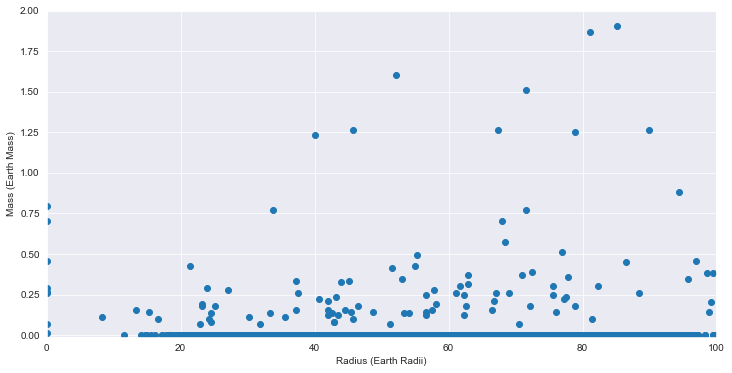

In [5]:
#plotting some initial parameters
plt.figure(figsize=(12,6))

#plotting in earth units
plt.scatter(exo_df['Planet_Rad(Jupiter_Rad)']*317.907,exo_df['Mass(Jupiter_Mass)']*11.2)
plt.xlim(-0.01, 100)
plt.ylim(-0.01, 2)
plt.xlabel("Radius (Earth Radii)")
plt.ylabel("Mass (Earth Mass)")

## Question 1: Classification

### Further Dataset Cleaning

Before I could start testing ML algorithms, I decided to refine the features I would use to classify the exoplanets. I did this by cleaning the dataset above even further, so that features that were non-numeric, or features that I did not think would make a difference in classification were dropped. 

I then refined the dataset further by removing any exoplanets for which we did not have data on mass or radius (radius from the second dataset, the radius from the first dataset remained).

In [64]:
#dropping columns I do not think are necessary for my ML code
exo_emma = exo_df.drop(columns=["Period_x",'ra','dec','#_of_Planets',
                                '%inCons_Hab_Zone','%inOp_Hab_Zone',
                                'OofI_Name','Classification','Tp_h','Ta_h',
                                'Classification_Score','Tp_w', 'Ta_w',
                               'Stellar_Surf_Grav'])

#filtering out exoplanets where both mass and radius are not included (0)
exo_emma_ml = exo_emma[exo_emma["Mass(Jupiter_Mass)"]!=0]
exo_emma_ml

,Name,Mass(Jupiter_Mass),Planet_Rad(Jupiter_Rad),Eccentricity,Period_y,Impact_Dist_to_Sun,Duration,Depth,Planet_Rad(Earth_Rad),Eq_Temp_Planet,Sol_Irradiance,Signal_Noise,Stellar_Teff,Stellar_Rad
11,Kepler-100b,0.023,0.118,0.000,6.887071,0.6960,4.46790,68.7,1.30,1155.0,420.97,38.2,5788.0,1.474
12,Kepler-100c,0.022,0.196,0.000,12.815904,0.5800,6.38560,220.5,2.26,939.0,183.68,106.7,5788.0,1.474
13,Kepler-100d,0.009,0.144,0.000,35.333193,0.6560,5.96600,99.7,1.55,670.0,47.52,28.8,5788.0,1.474
25,Kepler-101b,0.16,0.51,0.086,3.487689,0.0260,3.83661,1298.8,5.64,1445.0,1033.07,350.6,5576.0,1.593
26,Kepler-101c,0.01,0.112,0.000,6.029772,0.3790,3.96100,54.6,1.18,1204.0,496.46,11.5,5576.0,1.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,Kepler-97c,1.08,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2585,Kepler-98b,0.011,0.178,0.000,1.541677,0.3620,1.91180,296.5,1.88,1592.0,1517.84,94.1,5533.0,1.089
2597,Kepler-99b,0.019,0.132,0.000,4.603575,0.2460,2.34990,440.4,1.51,810.0,101.65,79.7,4783.0,0.741
2598,Kepler-9b,0.137,0.74,0.061,19.270826,0.1690,4.12810,6660.5,7.74,661.0,45.05,577.1,5779.0,0.956


### Creating Classification Labels for Training

In this section, I had to create my own classification labels for the ML predictions. I did so by using the classifications below from the Planetary Habitable Library.

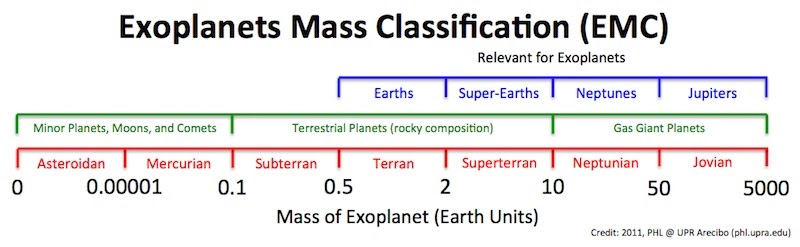

By creating these labels, and dropping classifications that I did not have more than 1 data point for, I created a complete set of data on which I could train the ML models.

I was curious about what the original distribution of classifications would look like, so I plotted those as well.

In [65]:
#creating an empty list to store values
classification = []

#creating labels for each row in the dataframe based on mass values and cited source
for i in range(len(exo_emma_ml)):
    
    mass = exo_emma_ml.iloc[i,1]
    
    #converting mass units to earth mass
    mass *= 317.777
    
    if mass < 0.1 and mass >= 0.00001:
        classification.append("Mercurian")
    if mass < 0.5 and mass >= 0.1:
        classification.append("Subterran")
    if mass < 2 and mass >= 0.5:
        classification.append("Terran")
    if mass < 10 and mass >= 2:
        classification.append("Superterran")
    if mass < 50 and mass >= 10:
        classification.append("Neptunian")
    if mass < 5000 and mass >= 50:
        classification.append("Jovian")
    if mass >= 5000:
        classification.append("Error")

#creating a new column in the dataframe that contains the labels created above
exo_emma_ml['Label'] = classification

#removing labels of 'Error' Those are inaccurate classifications and may skew the data
#removing "subterran" planets (there was only one which would not work in the ML train, test split)
exo_emma_ml = exo_emma_ml[exo_emma_ml['Label']!='Error']
exo_emma_ml = exo_emma_ml[exo_emma_ml['Label']!='Subterran']

C:\Users\eoswa\AppData\Local\Temp/ipykernel_2436/2110501854.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exo_emma_ml['Label'] = classification


Text(0, 0.5, 'Class')

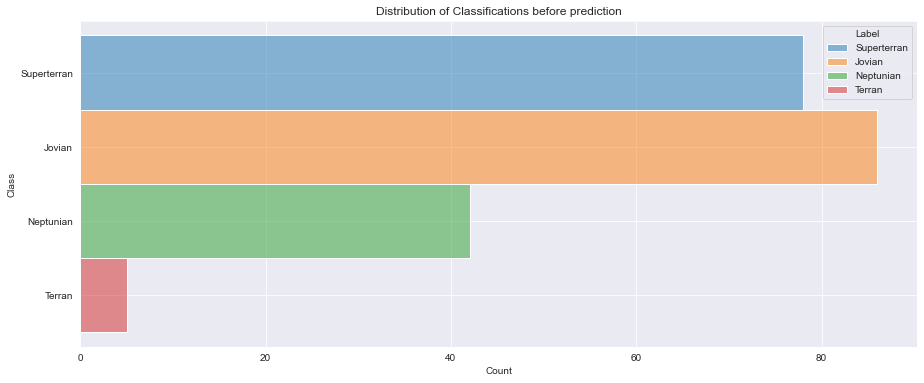

In [66]:
#plotting the distribution of the known data classifications
plt.figure(figsize=(15,6))

sns.histplot(data=exo_emma_ml, y = 'Label', hue='Label')
plt.title('Distribution of Classifications before prediction')
plt.ylabel("Class")

Then, I finally got rid of any last na values, and dropped the columns on which I made the classifications. I chose to do that because the data I had for those was very limited and small in size. I did not want my algorithm to train the classifiers on that data, because I knew it was data I did not have for the planets I wanted to classify later.

In [67]:
#dropping the mass and rad(from second dataset) columns so the program is not trained on them 
emma_ml = exo_emma_ml.drop(columns = ["Mass(Jupiter_Mass)",'Planet_Rad(Jupiter_Rad)'])
emma_ml = emma_ml.dropna()

#printing out the labels and the  length of the dataset to see if it is correct
emma_ml.iloc[:,-1]

11      Superterran
12      Superterran
13      Superterran
25           Jovian
26      Superterran
           ...     
2573    Superterran
2585    Superterran
2597    Superterran
2598      Neptunian
2599      Neptunian
Name: Label, Length: 179, dtype: object

### Testing Different ML Algorithms

In this section, I chose 6 different ML algorithms from SK-Learn to evaluate, K Nearest Neighbors, Gaussian Naive Bayes, Stochastic Gradient Descent, Support Vector Machines, Decision Trees, and Neural Networks. I chose each of these algortihms because I knew they were algorithms that could perform classifications, and a few (like KNN, SVM, and Neural Networks) I was already familiar with. 

In [68]:
#creating the train test split, by 70% training data
emma_train, emma_test, elabel_train, elabel_test = train_test_split(
    emma_ml.iloc[:,1:-1], emma_ml.iloc[:,-1], train_size=0.7, stratify=emma_ml.iloc[:,-1]) 

I started by running each model once individually to see how they performed on their own. The initial results were underwhelming.

**Note:** The outputs for each of these cells will be different each time the notebook is run. This is because I have not specified a random state, so the way in which the data is split is changing the results each time (this is expected and will be disucssed in our results and conclusions).

#### K-nearest Neighbors

In [69]:
# Use the KNN classifier to fit data:
knn = KNeighborsClassifier()
knn.fit(emma_train, elabel_train) 

# Predict y data with classifier: 
elabel_predict = knn.predict(emma_test)

# Print results: 
print(accuracy_score(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0))

0.6296296296296297
              precision    recall  f1-score   support

      Jovian       0.70      0.74      0.72        19
   Neptunian       0.25      0.09      0.13        11
 Superterran       0.63      0.83      0.72        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.63        54
   macro avg       0.40      0.41      0.39        54
weighted avg       0.57      0.63      0.59        54



#### Gaussian Naive Bayes

In [70]:
# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
gnb.fit(emma_train, elabel_train)
# Make predictions with the classifier:
elabel_predict = gnb.predict(emma_test)

# Evaluate label (subsets) accuracy:
print(accuracy_score(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0)) 

0.6296296296296297
              precision    recall  f1-score   support

      Jovian       0.82      0.74      0.78        19
   Neptunian       0.38      0.27      0.32        11
 Superterran       0.63      0.74      0.68        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.63        54
   macro avg       0.46      0.44      0.44        54
weighted avg       0.63      0.63      0.63        54



#### Stochiastic Gradient Descent

In [71]:
sgd = SGDClassifier()
sgd.fit(emma_train, elabel_train)

elabel_predict = sgd.predict(emma_test)

print(accuracy_score(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0))

0.6111111111111112
              precision    recall  f1-score   support

      Jovian       0.75      0.63      0.69        19
   Neptunian       0.00      0.00      0.00        11
 Superterran       0.55      0.91      0.69        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.61        54
   macro avg       0.33      0.39      0.34        54
weighted avg       0.50      0.61      0.53        54



#### Support Vector Machine

In [72]:
scm = svm.SVC()
scm.fit(emma_train, elabel_train)

elabel_predict = scm.predict(emma_test)

print(accuracy_score(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0)) 

0.6111111111111112
              precision    recall  f1-score   support

      Jovian       0.75      0.63      0.69        19
   Neptunian       0.00      0.00      0.00        11
 Superterran       0.55      0.91      0.69        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.61        54
   macro avg       0.33      0.39      0.34        54
weighted avg       0.50      0.61      0.53        54



#### Decision Trees

In [73]:
dtm = tree.DecisionTreeClassifier()
dtm.fit(emma_train, elabel_train)

elabel_predict = dtm.predict(emma_test)

print(accuracy_score(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0)) 

0.6666666666666666
              precision    recall  f1-score   support

      Jovian       0.74      0.89      0.81        19
   Neptunian       0.33      0.18      0.24        11
 Superterran       0.67      0.70      0.68        23
      Terran       1.00      1.00      1.00         1

    accuracy                           0.67        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.63      0.67      0.64        54



#### Neural Networks

In [74]:
mlp = MLPClassifier()
mlp.fit(emma_train, elabel_train)

elabel_predict = mlp.predict(emma_test)

print(accuracy_score(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0))

0.6481481481481481
              precision    recall  f1-score   support

      Jovian       0.76      0.84      0.80        19
   Neptunian       0.50      0.18      0.27        11
 Superterran       0.63      0.74      0.68        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.65        54
   macro avg       0.47      0.44      0.44        54
weighted avg       0.64      0.65      0.63        54



#### Testing Accuracy of Each Algorithm

Here, I decided to run each algorithm (fit, predict, test accuracy) 500 times, and find the algorithm that had the highest average accuracy rate each time. When I ran that test multiple different times, I noticed I was recieving vastly different results. So, I decided to run this test 5 different times and compare the results.

In [75]:

#creating a list of names of each for plotting
class_name = ['KNN', 'GNB', 'SGD', 'SVM', 'DTC', 'MLP']

#creating a list of runs names (will be runnign the program 5 times)
run = ("Run 1", "Run 2", "Run 3", "Run 4", "Run 5")

#intializing a dictionary to store values
accuracy1 = {'KNN': [],
            'GNB': [],
            'SGD': [],
            'SVM': [],
            'DTC': [],
            'MLP': []}



#looping through the iterations 5 times
for i in range(5):
    #initializing each of the algorithms I would be testing
    knn = KNeighborsClassifier()
    gnb = GaussianNB()
    sgd = SGDClassifier()
    scm = svm.SVC()
    dtc = tree.DecisionTreeClassifier()
    mlp = MLPClassifier()
    
    #creating a list of each of the initialized classifier algorithms
    classifiers = [knn,gnb,sgd,scm,dtc,mlp]
    
    #creating a new train test split
    emma_train, emma_test, elabel_train, elabel_test = train_test_split(
        emma_ml.iloc[:,1:-1], emma_ml.iloc[:,-1], train_size=0.7, 
        stratify=emma_ml.iloc[:,-1]) 
    
    
    #looping through each of the initialized classifiers
    for j in range(len(classifiers)):
        #initial value for accuracy and count
        a = 0
        count = 0
        #fitting, predicting, and calculating the accuracy of each model 500 times
        for x in range(0,500):
            
            classifiers[j].fit(emma_train, elabel_train)

            elabel_predict = classifiers[j].predict(emma_test)
            
            #adding accuracy score to a
            a += accuracy_score(elabel_test, elabel_predict)
            
            #adding to count
            count += 1
            
            #I was recieving warnings so I cleared them each time so as to not overwhelm the outputs
            clear_output(wait=False)
            
        #calculating and appending the average accuracy for each classifier to the dictionary
        accuracy1[class_name[j]].append(a/count)

#printing out the accuracy of the last run for each algorithm
for key in accuracy1:
    print(accuracy1[key][-1])

0.6111111111111093
0.5925925925925906
0.5562962962962946
0.6481481481481512
0.5529999999999968
0.4978518518518512


(0.4, 0.75)

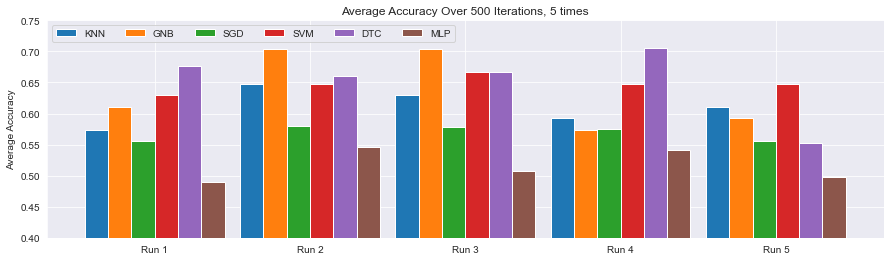

In [76]:
#creating a list the length of the number of groups i'd like to plot
x = np.arange(len(run))

#setting the width of each bar
width = 0.15 

#initializing a multiplier
multiplier = 0

#initializing a figure
fig, ax = plt.subplots(figsize=(15,4))

#looping through each item in the dictionary
for alg, acc in accuracy1.items():
    
    #creating an offset for the location of bars on the x-axis
    offset = width * multiplier
    
    #plotting the bars
    rects = ax.bar(x + offset, acc, width, label=alg)
    
    #adding one to the multiplier to offset the next set of bars
    multiplier += 1

#setting run as an array to use when setting the x ticks and x labels
run = np.array(run)

ax.set_ylabel('Average Accuracy')
ax.set_title('Average Accuracy Over 500 Iterations, 5 times')
ax.set_xticks(x+2.5*width)
ax.set_xticklabels(run)
ax.legend(loc='upper left',ncol=6)
ax.set_ylim(0.4, 0.75)

#### Adding a Random State

Here I decided to test what was causing the major differences in accuracy for each run. I did this by adding a random state variable to the train test split. 

In [77]:
#creating a list of names of each for plotting
class_name = ['KNN', 'GNB', 'SGD', 'SVM', 'DTC', 'MLP']

#creating a list of runs names (will be runnign the program 5 times)
run = ("Run 1", "Run 2", "Run 3", "Run 4", "Run 5")

#intializing a dictionary to store values
accuracy2 = {'KNN': [],
            'GNB': [],
            'SGD': [],
            'SVM': [],
            'DTC': [],
            'MLP': []}



#looping through the iterations 5 times
for i in range(5):
    #initializing each of the algorithms I would be testing
    knn = KNeighborsClassifier()
    gnb = GaussianNB()
    sgd = SGDClassifier()
    scm = svm.SVC()
    dtc = tree.DecisionTreeClassifier()
    mlp = MLPClassifier()
    
    #creating a list of each of the initialized classifier algorithms
    classifiers = [knn,gnb,sgd,scm,dtc,mlp]
    
    #creating a new train test split
    emma_train, emma_test, elabel_train, elabel_test = train_test_split(
        emma_ml.iloc[:,1:-1], emma_ml.iloc[:,-1], train_size=0.7, 
        stratify=emma_ml.iloc[:,-1], random_state=123) 
    
    
    #looping through each of the initialized classifiers
    for j in range(len(classifiers)):
        #initial value for accuracy and count
        a = 0
        count = 0
        #fitting, predicting, and calculating the accuracy of each model 500 times
        for x in range(0,500):
            
            classifiers[j].fit(emma_train, elabel_train)

            elabel_predict = classifiers[j].predict(emma_test)
            
            #adding accuracy score to a
            a += accuracy_score(elabel_test, elabel_predict)
            
            #adding to count
            count += 1
            
            #I was recieving warnings so I cleared them each time so as to not overwhelm the outputs
            clear_output(wait=False)
            
        #calculating and appending the average accuracy for each classifier to the dictionary
        accuracy2[class_name[j]].append(a/count)

#printing out the accuracy of the last run for each algorithm
for key in accuracy2:
    print(accuracy2[key][-1])

0.6481481481481512
0.6296296296296239
0.5693703703703695
0.6296296296296239
0.6569259259259257
0.5338518518518507


(0.5, 0.75)

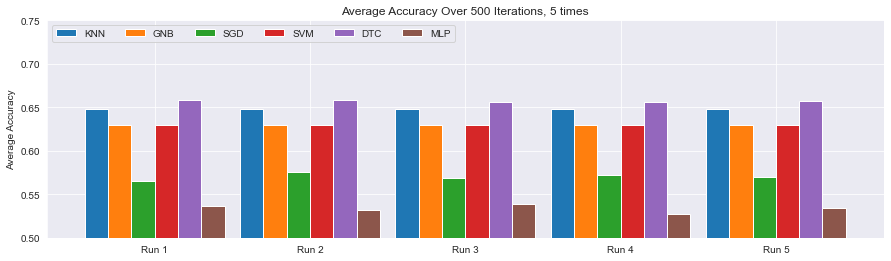

In [78]:
#creating a list the length of the number of groups i'd like to plot
x = np.arange(len(run))

#setting the width of each bar
width = 0.15 

#initializing a multiplier
multiplier = 0

#initializing a figure
fig, ax = plt.subplots(figsize=(15,4))

#looping through each item in the dictionary
for alg, acc in accuracy2.items():
    
    #creating an offset for the location of bars on the x-axis
    offset = width * multiplier
    
    #plotting the bars
    rects = ax.bar(x + offset, acc, width, label=alg)
    
    #adding one to the multiplier to offset the next set of bars
    multiplier += 1

#setting run as an array to use when setting the x ticks and x labels
run = np.array(run)

ax.set_ylabel('Average Accuracy')
ax.set_title('Average Accuracy Over 500 Iterations, 5 times')
ax.set_xticks(x+2.5*width)
ax.set_xticklabels(run)
ax.legend(loc='upper left',ncol=6)
ax.set_ylim(0.5, 0.75)

### Analysis Using Decision Trees

After realizing that much of my accuracy testing was inconclusive, I chose to use the Decision Trees algorithm. This is because it was an algorithm that I had not used before, and in the random state above, it performed the most accurately. This section contains the analysis of the Decision Trees algorithm, and the prediction of exoplanet classifications for the full dataset (the one we got at the end of the "Cleaning the Data" section) using this algorithm. This is also the final algorithm I used for our presentation.

**Note:** I did not use this random state in our presentation, so the results will be different from the ones which we presented. This will also be discussed in our results/conclusions.

In [79]:
#creating a new train test split for final analysis
emma_train, emma_test, elabel_train, elabel_test = train_test_split(
    emma_ml.iloc[:,1:-1], emma_ml.iloc[:,-1], train_size=0.7, 
    stratify=emma_ml.iloc[:,-1], random_state=123)

In [80]:
#initializing the dtc classifier
dtc = tree.DecisionTreeClassifier()

dtc_a = []

for x in range(0,500):
    
    #fitting and predicting classifications        
    model = dtc.fit(emma_train, elabel_train)

    elabel_predict = model.predict(emma_test)
            
    #adding accuracy score to a
    dtc_a.append(accuracy_score(elabel_test, elabel_predict))
            
    #I was recieving warnings so I cleared them each time so as to not overwhelm the outputs
    clear_output(wait=False)
            
#calculating and appending the average accuracy for each classifier to the dictionary
avg_acc = np.mean(dtc_a)
final_acc = accuracy_score(elabel_test, elabel_predict)

#printing final quantitative analysis of the model
print("Average Accuracy over 500 Iterations:", avg_acc)
print("Final Accuracy:", final_acc)

# model = dtc.fit(emma_train, elabel_train)

# elabel_predict = model.predict(emma_test)

# print(accuracy_score(elabel_test, elabel_predict))
print(confusion_matrix(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0))

Average Accuracy over 500 Iterations: 0.6563703703703705
Final Accuracy: 0.6666666666666666
[[14  3  2  0]
 [ 3  3  4  1]
 [ 0  4 19  0]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

      Jovian       0.82      0.74      0.78        19
   Neptunian       0.30      0.27      0.29        11
 Superterran       0.73      0.83      0.78        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.67        54
   macro avg       0.46      0.46      0.46        54
weighted avg       0.66      0.67      0.66        54



Text(0.5, 0, 'Relative Importance')

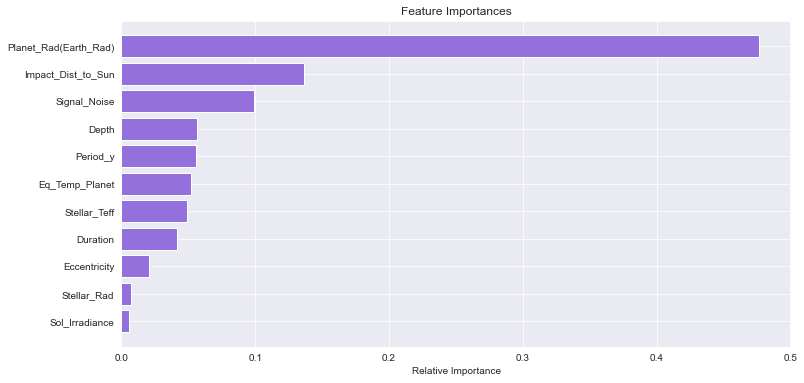

In [81]:
#pulling out the feature names used in the ml algorithm (columns from my dataset)
features = emma_ml.iloc[:,1:-1].columns

#pulling out the importance that each feature had in determining the classifications
importances = dtc.feature_importances_

#sorting the importances by highest to lowest
indices = np.argsort(importances)

#creating list of x values for plotting
x = np.arange(0,len(indices))

#creating the figure
fig, ax = plt.subplots(figsize=(12,6))

#plotting the features and their importances in order of most to least important
ax.barh(range(len(indices)), importances[indices], color ='mediumpurple', align='center')
ax.set_yticks(x)

#setting y labels by indexing and looping columns list for sorted indices
ax.set_yticklabels([features[i] for i in indices])
ax.set_title('Feature Importances')
ax.set_xlabel('Relative Importance')

#### Predicting for Entire Merged Dataset

In [82]:
#exo_emma = exo_emma.drop(columns=["Class"]) #line was used for running this cell multiple times in a row

#dropping any na values in the original filtered dataframe
exo_emma = exo_emma.dropna()

#predicting the classifications of each exoplanet in the original filtered dataframe
emma_predict = dtc.predict(exo_emma.iloc[:,3:])

#inputing that predicted list as a column in the original dataframe.
exo_emma["Class"]=emma_predict

Text(0, 0.5, 'Class')

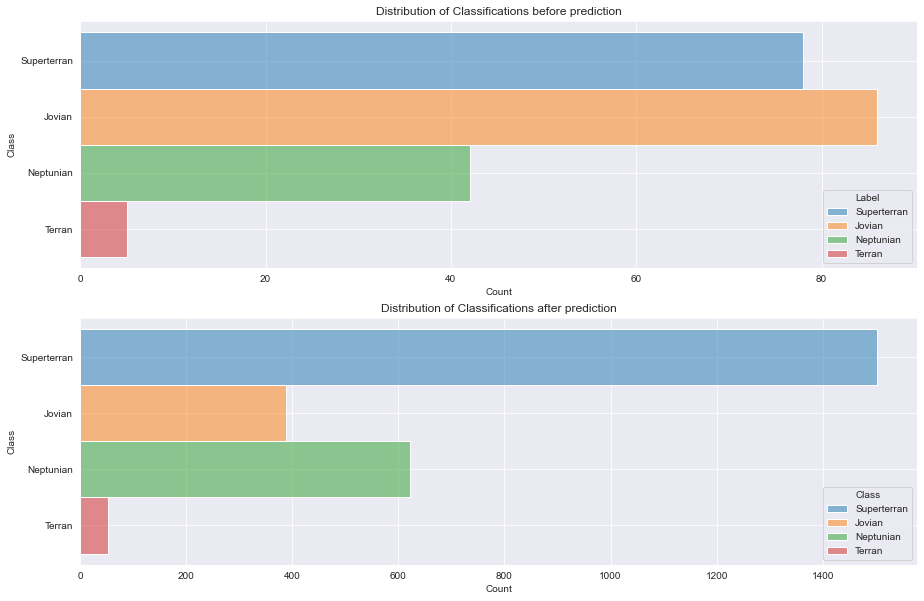

In [83]:
#plotting the original distribution of classes and the predicted distribution of classes
#using the same method as above
plt.figure(figsize = (15,10))

plt.subplot(211)
sns.histplot(data=exo_emma_ml, y = 'Label', hue='Label')
plt.title('Distribution of Classifications before prediction')
plt.ylabel("Class")

plt.subplot(212)
sns.histplot(data=exo_emma, y='Class', hue="Class")
plt.title("Distribution of Classifications after prediction")
plt.ylabel("Class")

In [84]:
#filtering the final dataframe for only earth-like (terran) planets
emma_terran = exo_emma[exo_emma["Class"]=="Terran"]
emma_terran

,Name,Mass(Jupiter_Mass),Planet_Rad(Jupiter_Rad),Eccentricity,Period_y,Impact_Dist_to_Sun,Duration,Depth,Planet_Rad(Earth_Rad),Eq_Temp_Planet,Sol_Irradiance,Signal_Noise,Stellar_Teff,Stellar_Rad,Class
14,Kepler-1010b,0.0,0.207,0.000,34.268574,0.677,4.8251,699.3,2.44,477.0,12.20,38.2,5083.0,0.872,Terran
34,Kepler-1027b,0.0,0.079,0.000,1.907811,0.410,1.8707,120.5,0.91,1268.0,609.28,40.9,5435.0,0.824,Terran
62,Kepler-1047b,0.0,0.186,0.000,56.188644,0.873,6.5272,346.2,2.56,503.0,15.13,35.6,5700.0,1.176,Terran
65,Kepler-1049b,0.0,0.085,0.000,3.273448,0.440,1.7292,262.5,0.81,625.0,36.05,34.0,3758.0,0.496,Terran
82,Kepler-1060b,0.0,0.212,0.000,46.877672,0.834,10.0410,539.8,2.62,484.0,13.01,37.5,5504.0,0.993,Terran
145,Kepler-1101b,0.0,0.22,0.000,81.315305,0.013,5.8070,715.5,2.55,393.0,5.64,20.7,5325.0,0.975,Terran
162,Kepler-1116b,0.0,0.227,0.000,41.697758,0.018,5.5130,684.8,2.26,488.0,13.45,27.7,5730.0,0.870,Terran
164,Kepler-1118b,0.0,0.244,0.000,38.671584,0.773,5.5320,599.3,2.45,502.0,15.03,25.2,5432.0,0.913,Terran
185,Kepler-1132b,0.0,0.21,0.000,62.891749,0.632,6.8310,791.0,2.50,384.0,5.13,22.6,5052.0,0.855,Terran
222,Kepler-1162b,0.0,0.197,0.000,32.563525,0.371,5.4180,578.3,2.05,490.0,13.63,24.1,5225.0,0.859,Terran


## Question 2: Habitablility

In [85]:
lucas_df = exo_df.drop(columns=['ra','dec', 'Name', 'Mass(Jupiter_Mass)','Planet_Rad(Jupiter_Rad)','OofI_Name','Classification','Ta_h','Ta_w','Tp_h','Tp_w',])

Temp = lucas_df['Eq_Temp_Planet']

pd.options.display.max_columns = None
lucas_df.iloc[45:50,:]

,Period_x,Eccentricity,%inCons_Hab_Zone,%inOp_Hab_Zone,Classification_Score,Period_y,Impact_Dist_to_Sun,Duration,Depth,Planet_Rad(Earth_Rad),Eq_Temp_Planet,Sol_Irradiance,Signal_Noise,#_of_Planets,Stellar_Teff,Stellar_Surf_Grav,Stellar_Rad
45,7.6,0.0,0.0,0.0,0.998,7.560522,0.022,3.8573,659.8,2.40,914.0,164.90,34.6,1.0,5895.0,4.503,0.940
46,12.1,0.0,0.0,0.0,1.000,12.124017,0.029,3.3091,788.4,2.37,675.0,48.98,40.1,1.0,5094.0,4.469,0.870
47,2.7,0.0,0.0,0.0,0.998,2.714078,0.868,1.3115,143.5,1.38,1301.0,675.86,36.8,1.0,5815.0,4.461,0.992
48,122.9,0.0,0.0,0.0,1.000,122.879954,0.872,7.8350,717.7,2.70,326.0,2.66,41.9,1.0,5413.0,4.510,0.861
49,1.1,0.0,0.0,0.0,1.000,1.063789,0.466,1.0720,251.5,1.61,1650.0,1761.19,21.5,1.0,5265.0,4.400,1.002


In [86]:
# somehow add'Eq_Temp_Planet'
Y = lucas_df[['Eq_Temp_Planet']]
planettemp = lucas_df[['Eq_Temp_Planet']]
planettemp
print(len(planettemp),len(Temp))

2601 2601


In [87]:
habs_list = []
print(len(Temp))
for i in range(len(Temp)):
    curtemp = Temp[i]
    
    if np.isnan(curtemp):  
        habs_list.append("empty")
    else:
        curtemp = curtemp-273.15

        if curtemp < -50 and curtemp >= -100:
            habs_list.append("Class HP")
        if curtemp < 0 and curtemp >= -50:
            habs_list.append("Class P")
        if curtemp < 50 and curtemp >= 0:
            habs_list.append("Class M")
        if curtemp < 100 and curtemp >= 50:
            habs_list.append("Class T")
        if curtemp < 150 and curtemp >= 100:
            habs_list.append("Class HT")  
        if curtemp >150:
            habs_list.append('Class Y') #super duper hot
        if curtemp < -100:
            habs_list.append('Cold Planet') #cold as shit
                   
print(len(habs_list))
planettemp["Label"] = habs_list

2601
2601


C:\Users\eoswa\AppData\Local\Temp/ipykernel_2436/2049372.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planettemp["Label"] = habs_list


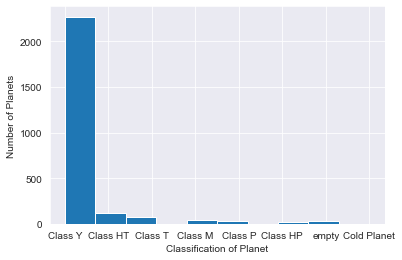

In [88]:
plt.hist(planettemp['Label'])
plt.ylabel("Number of Planets")
plt.xlabel("Classification of Planet")
plt.savefig('classificationofplanets')

In [89]:
lucas_df = lucas_df.dropna(subset=['Eq_Temp_Planet'])
X = lucas_df.drop('Eq_Temp_Planet',axis =1) 



habs_list = [var for var in habs_list if var != "empty"]

Y = habs_list

print(len(X))

2565


In [90]:
X = X.fillna(0)


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=123)

In [92]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

label_predict = clf.predict(X_test)

print(accuracy_score(Y_test, label_predict))
print(confusion_matrix(Y_test, label_predict))
print(classification_report(Y_test, label_predict)) 

0.8862928348909658
[[  0   0   0   0   0   5]
 [  0   0   0   0   0  32]
 [  0   0   0   0   0  11]
 [  0   0   0   0   0   7]
 [  0   0   0   0   0  18]
 [  0   0   0   0   0 569]]
              precision    recall  f1-score   support

    Class HP       0.00      0.00      0.00         5
    Class HT       0.00      0.00      0.00        32
     Class M       0.00      0.00      0.00        11
     Class P       0.00      0.00      0.00         7
     Class T       0.00      0.00      0.00        18
     Class Y       0.89      1.00      0.94       569

    accuracy                           0.89       642
   macro avg       0.15      0.17      0.16       642
weighted avg       0.79      0.89      0.83       642



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
"""X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=420)
model =LinearRegression()
param = [{'kernel' :['linear'],'C':[10.0], 'gamma':[10.0]}]
svc = svm.SVR()
clf = GridSearchCV(svc, param, n_jobs = -1)
clf.fit(X,Y)"""
exo_df['Name']

0       Kepler-1000b
1       Kepler-1001b
2       Kepler-1001c
3       Kepler-1002b
4       Kepler-1003b
            ...     
2596     Kepler-999b
2597      Kepler-99b
2598       Kepler-9b
2599       Kepler-9c
2600       Kepler-9d
Name: Name, Length: 2601, dtype: object

In [94]:
index_vals = []
for i in range(len(habs_list)):
    if habs_list[i] == 'Class M':
        index_vals.append([i])
len(index_vals)

47

In [95]:
ClassMPlanets = []
for i in index_vals:
    print(str(exo_df.iloc[i,0]))
    ClassMPlanets.append(str(exo_df.iloc[i,0]))
    
print(ClassMPlanets)


50    Kepler-1038b
Name: Name, dtype: object
55    Kepler-1040b
Name: Name, dtype: object
119    Kepler-1085b
Name: Name, dtype: object
128    Kepler-1090b
Name: Name, dtype: object
525    Kepler-1388d
Name: Name, dtype: object
526    Kepler-1388e
Name: Name, dtype: object
604    Kepler-144b
Name: Name, dtype: object
667    Kepler-149b
Name: Name, dtype: object
672    Kepler-1501b
Name: Name, dtype: object
685    Kepler-150f
Name: Name, dtype: object
719    Kepler-1536b
Name: Name, dtype: object
730    Kepler-1542e
Name: Name, dtype: object
734    Kepler-1546b
Name: Name, dtype: object
744    Kepler-1551b
Name: Name, dtype: object
800    Kepler-1598b
Name: Name, dtype: object
809    Kepler-1603b
Name: Name, dtype: object
843    Kepler-1630b
Name: Name, dtype: object
921    Kepler-1696b
Name: Name, dtype: object
975    Kepler-1738b
Name: Name, dtype: object
982    Kepler-1743b
Name: Name, dtype: object
1064    Kepler-1808b
Name: Name, dtype: object
1094    Kepler-1832b
Name: Name, dtype

## Combining Our Results

In [96]:
if 'Kepler-1038b' in ClassMPlanets[0]:
    print("True")

True


In [97]:
habitable_exo = pd.DataFrame(columns=list(emma_terran.columns))
count = 0
for i in range(len(habs_list)):
    for j in range(len(emma_terran)):
        name = emma_terran.iloc[j,0]
        
        if name in habs_list[i]:
            habitable_exo
        else:
            habs_list[i] = "Inhabitable"


In [98]:
for i in range(len(ClassMPlanets)):
    if "Kepler-1551b" in ClassMPlanets[i]:
        print("Kepler-1551b is habitable!")
        
emma_terran[emma_terran["Name"]=="Kepler-1551b"]

Kepler-1551b is habitable!


,Name,Mass(Jupiter_Mass),Planet_Rad(Jupiter_Rad),Eccentricity,Period_y,Impact_Dist_to_Sun,Duration,Depth,Planet_Rad(Earth_Rad),Eq_Temp_Planet,Sol_Irradiance,Signal_Noise,Stellar_Teff,Stellar_Rad,Class


## Results and Discussion

It became clear very early on that we were working with a very limited dataset. There were very few exoplanets for which we had a complete set of data that we needed for our processing. For example, for some we had masses and radii parameters for roughly 250 exoplanets (which was needed for question 1), but did not have equilibrium temperatures (which was needed for question 2) for many of those same exoplanets. We can see this in our initial visualizations below. On the graphs we have many masses and radii at 0, which indicates that we do not have that information for those planets. We also see many equilibrium temperatures at 0, so we can come to the same conclusions that we do not have that information.

Text(0, 0.5, 'Mass (Earth Mass)')

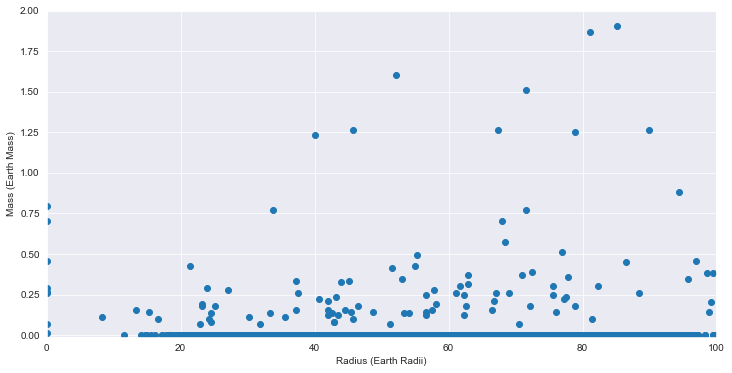

In [99]:
#plotting some initial parameters
plt.figure(figsize=(12,6))

#plotting in earth units
plt.scatter(exo_df['Planet_Rad(Jupiter_Rad)']*317.907,exo_df['Mass(Jupiter_Mass)']*11.2)
plt.xlim(-0.01, 100)
plt.ylim(-0.01, 2)
plt.xlabel("Radius (Earth Radii)")
plt.ylabel("Mass (Earth Mass)")

Due to the fact that our data was limited, we knew we would have to take extra steps to accurate classify and analyze our data. The next visualization was created when testing the average accuracy of the 6 different Machine Learning algorithms from SK Learn. We did not use any hyperparameters to determine a baseline accuracy for each model. We fit each model 500 times, and calculated the average accuracy score of each model for the course of the 500 runs. We did this 5 different times to see how the accuracy changes with each run. What we see below shows that for every run, the average accuracies vary extensively. I have run this test many different times with widely different results each time. 

(0.5, 0.75)

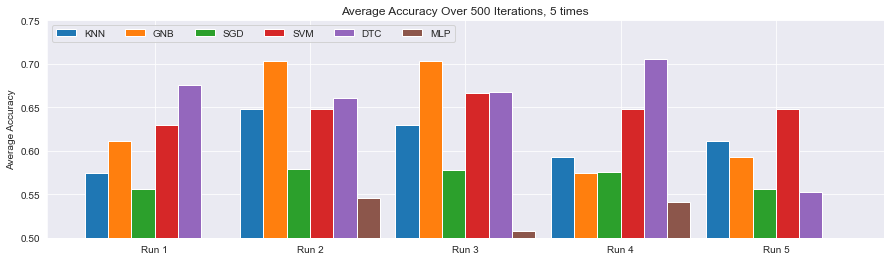

In [100]:
#creating a list the length of the number of groups i'd like to plot
x = np.arange(len(run))

#setting the width of each bar
width = 0.15 

#initializing a multiplier
multiplier = 0

#initializing a figure
fig, ax = plt.subplots(figsize=(15,4))

#looping through each item in the dictionary
for alg, acc in accuracy1.items():
    
    #creating an offset for the location of bars on the x-axis
    offset = width * multiplier
    
    #plotting the bars
    rects = ax.bar(x + offset, acc, width, label=alg)
    
    #adding one to the multiplier to offset the next set of bars
    multiplier += 1

#setting run as an array to use when setting the x ticks and x labels
run = np.array(run)

ax.set_ylabel('Average Accuracy')
ax.set_title('Average Accuracy Over 500 Iterations, 5 times')
ax.set_xticks(x+2.5*width)
ax.set_xticklabels(run)
ax.legend(loc='upper left',ncol=6)
ax.set_ylim(0.5, 0.75)

However a few things have remained constant.
- The average accuracy for any model has never dipped below .48 and has never gone above .83.
- MLP and SGD are always among the lowest-performing models.
- SVM, GNB, and DTC are always among the highest-performing models.

We then set out to find a way to create more consistent results for each time this chuck of code is ran. The first thing I decided to test was setting a random state in the train test split. We chose a random number and ran the same code above. In this test the differences in average accuracies of each model was very small, if there way any difference. We then ran the same code with multiple different random states, and each time we got vastly different accuracies. However, every time we returned to a random state we had used before, we got the same result. As such we picked random state at random, which in this instance is 333. The accuracy for each model with this random state is pictured below. (Note: Using a random state is not something that we used in our presentation).

(0.5, 0.75)

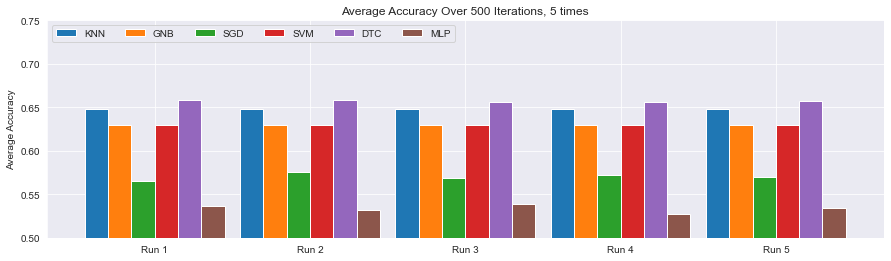

In [101]:
#creating a list the length of the number of groups i'd like to plot
x = np.arange(len(run))

#setting the width of each bar
width = 0.15 

#initializing a multiplier
multiplier = 0

#initializing a figure
fig, ax = plt.subplots(figsize=(15,4))

#looping through each item in the dictionary
for alg, acc in accuracy2.items():
    
    #creating an offset for the location of bars on the x-axis
    offset = width * multiplier
    
    #plotting the bars
    rects = ax.bar(x + offset, acc, width, label=alg)
    
    #adding one to the multiplier to offset the next set of bars
    multiplier += 1

#setting run as an array to use when setting the x ticks and x labels
run = np.array(run)

ax.set_ylabel('Average Accuracy')
ax.set_title('Average Accuracy Over 500 Iterations, 5 times')
ax.set_xticks(x+2.5*width)
ax.set_xticklabels(run)
ax.legend(loc='upper left',ncol=6)
ax.set_ylim(0.5, 0.75)

Based on the random state we chose above, the algorithm with the highest accuracy before any hyperparameter tuning was the Decision Trees classifier. This is the algorithm we then chose to use for our classifications.

With the random state we chose above we redefined and refit the classifier to the same data (to start with a clean state). The accuracy of this specific model is shown below.

In [102]:
#initializing the dtc classifier
dtc = tree.DecisionTreeClassifier()

#fitting and predicting classifications
model = dtc.fit(emma_train, elabel_train)

label_predict = model.predict(emma_test)

#printing final quantitative analysis of the model
print(accuracy_score(elabel_test, elabel_predict))
print(confusion_matrix(elabel_test, elabel_predict))
print(classification_report(elabel_test, elabel_predict, zero_division=0))

0.6666666666666666
[[14  3  2  0]
 [ 3  3  4  1]
 [ 0  4 19  0]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

      Jovian       0.82      0.74      0.78        19
   Neptunian       0.30      0.27      0.29        11
 Superterran       0.73      0.83      0.78        23
      Terran       0.00      0.00      0.00         1

    accuracy                           0.67        54
   macro avg       0.46      0.46      0.46        54
weighted avg       0.66      0.67      0.66        54



We also wanted to analyze which features that the dataset was being trained on was the most important. To do so we found some code online (which is cited in our references) that extracts the features and their importance’s in the model. Those feature importance’s are plotted below.

Text(0.5, 0, 'Relative Importance')

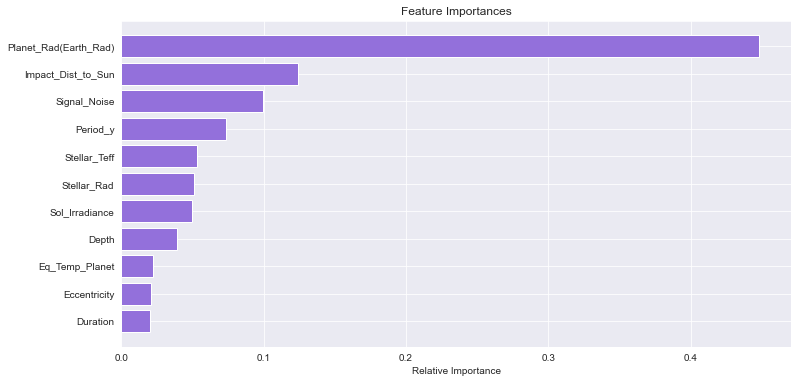

In [103]:
#pulling out the feature names used in the ml algorithm (columns from my dataset)
features = emma_ml.iloc[:,1:-1].columns

#pulling out the importance that each feature had in determining the classifications
importances = dtc.feature_importances_

#sorting the importances by highest to lowest
indices = np.argsort(importances)

#creating list of x values for plotting
x = np.arange(0,len(indices))

#creating the figure
fig, ax = plt.subplots(figsize=(12,6))

#plotting the features and their importances in order of most to least important
ax.barh(range(len(indices)), importances[indices], color ='mediumpurple', align='center')
ax.set_yticks(x)

#setting y labels by indexing and looping columns list for sorted indices
ax.set_yticklabels([features[i] for i in indices])
ax.set_title('Feature Importances')
ax.set_xlabel('Relative Importance')

Unsurprisingly, planetary radius was the most important feature for classifying these exoplanets. This makes sense because mass and radius are the most closely related physical characters that we have for these exoplanets, and mass is what these planets are actually being classified on. It is important to note that these feature importance’s also change for different random states.

We then used this model to predict the classifications of the remaining un-classified planets in our original cleaned data frame. We compared the distribution of the ML predicted classifications to that of the known classifications generated when we created the labels.

Text(0, 0.5, 'Class')

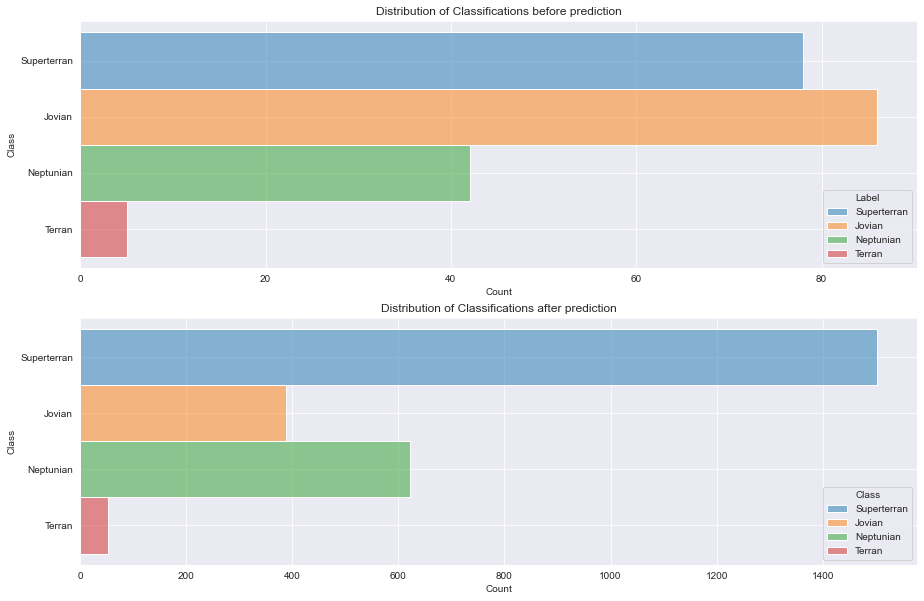

In [104]:
plt.figure(figsize = (15,10))

plt.subplot(211)
sns.histplot(data=exo_emma_ml, y = 'Label', hue='Label')
plt.title('Distribution of Classifications before prediction')
plt.ylabel("Class")

plt.subplot(212)
sns.histplot(data=exo_emma, y='Class', hue="Class")
plt.title("Distribution of Classifications after prediction")
plt.ylabel("Class")

Surprisingly, the distribution of these were not the same. They ended up being very similar, but there was some big differences. For instance in our predicted labels there were more Neptunian planets than Jovian planets, which was not the case for our testing/training data.

Ultimately, under our conditions we predicted ### of exoplanets found by the Kepler mission where earth-like (Terran). We made these classifications with a ## accuracy scoring.

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

“Grouped Bar Chart with Labels.” Grouped Bar Chart with Labels - Matplotlib 3.7.1 Documentation, https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html. 

“The Habitable Zone Gallery.” The Habitable Zone Gallery: Table of Temperatures, Habitable Zones, and Exoplanetary Orbital Parameters, http://www.hzgallery.org/table.html. 

Jara-Maldonado, Miguel, et al. “Transiting Exoplanet Discovery Using Machine Learning Techniques: A Survey - Earth Science Informatics.” SpringerLink, Springer Berlin Heidelberg, 5 June 2020, https://link.springer.com/article/10.1007/s12145-020-00464-7. 

“A Mass Classification for Both Solar and Extrasolar Planets.” PHL @ UPR Arecibo, https://phl.upr.edu/library/labnotes/a-mass-classification-for-both-solar-and-extrasolar-planets. 

“NASA Exoplanet Archive.” NASA Exoplanet Archive, https://exoplanetarchive.ipac.caltech.edu/. 

Ofman, Leon, et al. “Automated Identification of Transiting Exoplanet Candidates in NASA Transiting Exoplanets Survey Satellite (TESS) Data with Machine Learning Methods.” ArXiv.org, 27 Aug. 2021, https://arxiv.org/abs/2102.10326#:~:text=A%20novel%20artificial%20intelligence%20%28AI%29%20technique%20that%20uses,Survey%20Satellite%20%28TESS%29%20dataset%20to%20identify%20exoplanetary%20candidates. 

user348547user348547                    61311 gold badge66 silver badges44 bronze badges, et al. “Random Forest Feature Importance Chart Using Python.” Stack Overflow, 1 Feb. 1964, https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python. 

##  Appendices


### Individual Responsibilities:

#### Emma: 
- All of Question 1, including any written content for it in the Notebook.
- Combining Our individual results at the end.
- Introduction, Results, Conclusion, Citations, Appendicies in the Notebook.
- Methodology for Q1, Citations in the Report.

#### Lucas:
- All of Question 2, including any written content for it in the Notebook
- Abstract, Introduction, Methodology for Q2, Results and Discussion, Conclusion and Perspectives in the Report.

#### Together we worked on (aka, met and worked on over zoom):
- Determining what packages to use
- Finding our data
- Cleaning the data 
    - Brainstorming how to clean, how much to clean
    - figuring out how to merge the data
- Creating and walking through our presentation


### Backup Plan: 

We created and used a GitHub Repository to backup our project when we worked on it. Our checkin history is as follows: